In [2]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
from scipy import linalg as la
from scipy import stats as sts
from scipy import integrate
from scipy import optimize as opt
import autograd.numpy as anp
from autograd.numpy.linalg import solve, norm
from autograd import grad, jacobian
from scipy import sparse

In [3]:
def problem_1():
    
    x = sy.symbols('x')
    f = (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))
    df = sy.diff(f, x)
    lam_df = sy.utilities.lambdify(x, df)
    lam_f = sy.utilities.lambdify(x, f)
    
    return lam_f, lam_df

In [4]:
f, df = problem_1()

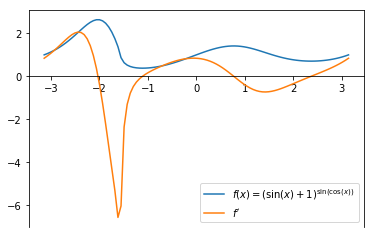

In [5]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
domain = np.linspace(-np.pi, np.pi, 100)
ax.plot(domain, f(domain), label=r'$f(x) = (\sin(x) + 1)^{\sin(\cos(x))}$')
ax.plot(domain, df(domain), label=r'$f^{\prime}$')
plt.legend()
plt.show()

In [7]:
# Question 2
def forward_o1(f, x, h): 
    num = f(x+h) - f(x)
    den = h
    return num / den

def forward_o2(f, x, h):
    num = -3 * f(x) + 4 * f(x + h) - f(x + 2 * h)
    den = 2 * h
    return num / den

def backward_o1(f, x, h):
    num = f(x) - f(x-h) 
    den = h
    return num / den

def backward_o2(f, x, h):
    num = 3 * f(x) - 4 * f(x - h) + f(x - 2 * h)
    den = 2 * h
    return num / den

def centered_o2(f, x, h):
    num = f(x + h) - f(x - h)
    den = 2 * h
    return num / den

def centered_o4(f, x, h):
    num = f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)
    den = 12 * h
    return num / den

def test_func(x):
    return (np.sin(x) + 1) ** (np.sin(np.cos(x)))


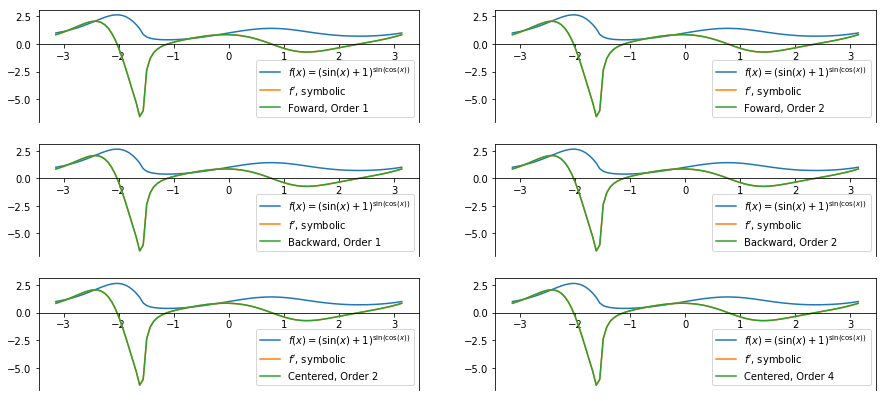

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(15,7))
h = 1e-5

def make_plot(ax, f, symdf, df, domain, h, label):
    ax.spines["bottom"].set_position("zero")
    domain = np.linspace(-np.pi, np.pi, 100)
    ax.plot(domain, f(domain), label=r'$f(x) = (\sin(x) + 1)^{\sin(\cos(x))}$')
    ax.plot(domain, symdf(domain), label=r'$f^{\prime}$, symbolic')
    ax.plot(domain, df(test_func, domain, h), label=label)
    ax.legend()

make_plot(ax[0,0], f, df, forward_o1, domain, h, 'Foward, Order 1')  
make_plot(ax[0,1], f, df, forward_o2, domain, h, 'Foward, Order 2')   
make_plot(ax[1,0], f, df, backward_o1, domain, h, 'Backward, Order 1')   
make_plot(ax[1,1], f, df, backward_o2, domain, h, 'Backward, Order 2')   
make_plot(ax[2,0], f, df, centered_o2, domain, h, 'Centered, Order 2')   
make_plot(ax[2,1], f, df, centered_o4, domain, h, 'Centered, Order 4')   
plt.show()

In [9]:
np.linalg.norm(df(domain) - forward_o1(test_func, domain, h), np.inf)

0.0007585211756913068

In [10]:
np.linalg.norm(df(domain) - forward_o2(test_func, domain, h), np.inf)

3.1597151473050644e-07

In [11]:
np.linalg.norm(df(domain) - backward_o1(test_func, domain, h), np.inf)

0.0007588362973107721

In [12]:
np.linalg.norm(df(domain) - backward_o2(test_func, domain, h), np.inf)

3.1595486138513706e-07

In [13]:
np.linalg.norm(df(domain) - centered_o2(test_func, domain, h), np.inf)

1.5756080973261533e-07

In [14]:
np.linalg.norm(df(domain) - centered_o4(test_func, domain, h), np.inf)

2.786721964298522e-10

In [16]:
## Question 3
h = np.logspace(-8, 1, num=10)
fo1 = np.zeros(len(h), dtype=np.float64)
fo2 = np.zeros(len(h), dtype=np.float64)
bo1 = np.zeros(len(h), dtype=np.float64)
bo2 = np.zeros(len(h), dtype=np.float64)
co2 = np.zeros(len(h), dtype=np.float64)
co4 = np.zeros(len(h), dtype=np.float64)

In [17]:
f, df = problem_1()
domain = 1

In [18]:
for index, hlevel in enumerate(h):
    fo1[index] = np.abs(df(domain) - forward_o1(test_func, domain, hlevel))
    fo2[index] = np.abs(df(domain) - forward_o2(test_func, domain, hlevel))
    bo1[index] = np.abs(df(domain) - backward_o1(test_func, domain, hlevel))
    bo2[index] = np.abs(df(domain) - backward_o2(test_func, domain, hlevel))
    co2[index] = np.abs(df(domain) - centered_o2(test_func, domain, hlevel))
    co4[index] = np.abs(df(domain) - centered_o4(test_func, domain, hlevel))

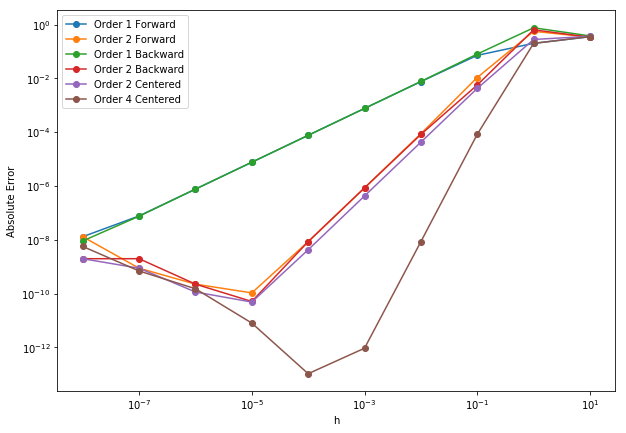

In [19]:
fig = plt.figure(figsize=(10,7))
plt.loglog()
plt.plot(h, fo1, '-o', label='Order 1 Forward')
plt.plot(h, fo2, '-o', label='Order 2 Forward')
plt.plot(h, bo1, '-o', label='Order 1 Backward')
plt.plot(h, bo2, '-o', label='Order 2 Backward')
plt.plot(h, co2, '-o', label='Order 2 Centered')
plt.plot(h, co4, '-o', label='Order 4 Centered')
plt.legend()
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.show()

In [21]:
## Questoin 4
data = np.load('plane.npy')
data

array([[ 7.  , 56.25, 67.54],
       [ 8.  , 55.53, 66.57],
       [ 9.  , 54.8 , 65.59],
       [10.  , 54.06, 64.59],
       [11.  , 53.34, 63.62],
       [12.  , 52.69, 62.74],
       [13.  , 51.94, 61.72],
       [14.  , 51.28, 60.82]])

In [22]:
alpha_rad = np.radians(data[:,1])
beta_rad = np.radians(data[:,2])
a = 500

xpos = a * np.tan(beta_rad) / (np.tan(beta_rad) - np.tan(alpha_rad))
ypos  = a * np.tan(beta_rad) * np.tan(alpha_rad) / (np.tan(beta_rad)- np.tan(alpha_rad))

In [23]:
t = np.arange(8, 14)
xprime = np.zeros(8, dtype=np.float64)
yprime = np.zeros(8, dtype=np.float64)
h = 1e-4

for ii in range(len(xprime)):
    if ii == 0:
        xprime[ii] = xpos[ii+1] - xpos[ii]
        yprime[ii] = ypos[ii+1] - ypos[ii]
    elif ii == 7:
        xprime[ii] = xpos[ii] - xpos[ii-1] 
        yprime[ii] = ypos[ii] - ypos[ii-1] 
    else:
        xprime[ii] = .5 * (xpos[ii+1] - xpos[ii-1])
        yprime[ii] = .5 * (ypos[ii+1] - ypos[ii-1])

In [24]:
speed = np.sqrt(xprime ** 2 + yprime ** 2)
speed

array([46.42420062, 47.00103938, 48.99880514, 50.09944163, 48.29035084,
       51.56455905, 53.92303355, 51.51480057])

In [25]:
## Question 5
def approx_jacob(f, x, h):
    n = np.shape(x)[0]
    m = np.shape(f(x))[0]
    
    jacobian = np.zeros((m,n))
    for ii in range(n):
        eii = np.eye(n)[:,ii]
        jacobian[:, ii] = (f(x + h * eii) - f(x - h * eii)) / (2 * h)
    return jacobian

In [26]:
f = lambda x: np.array([x[0] ** 2, x[0] ** 3 - x[1]])
approx_jacob(f, np.array([0, 0]), 1e-4)

array([[ 0.e+00,  0.e+00],
       [ 1.e-08, -1.e+00]])

In [27]:
x, y = sy.symbols('x, y')
f1 = x ** 2
f2 = x ** 3 - y
F = sy.Matrix([f1,f2])  
F.jacobian([x,y])

Matrix([
[   2*x,  0],
[3*x**2, -1]])

In [29]:
F.jacobian([x,y]).subs([(x,0), (y,0)])

Matrix([
[0,  0],
[0, -1]])

In [30]:
## Question 6
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

In [31]:
def T(x, n):
    
    if n == 0:
        return anp.ones_like(x)
    elif n == 1:
        return x
        
    return 2 * x * T(x, n - 1) - T(x, n - 2)

/Users/alexweinberg/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


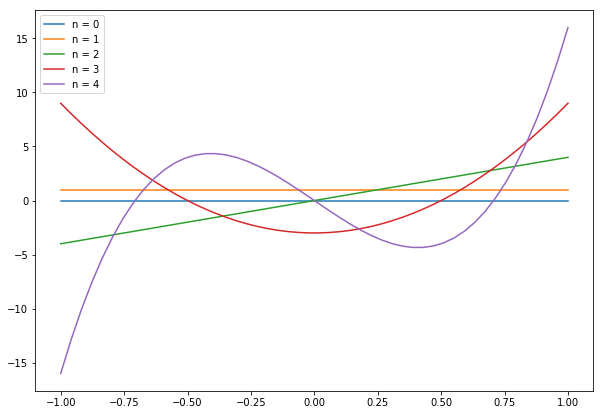

In [32]:
dT = elementwise_grad(T)
x_grid = anp.linspace(-1, 1)
plt.figure(figsize=(10, 7))
for nn in range(5):
    plt.plot(x_grid, dT(x_grid, nn), label=f'n = {nn}')
plt.legend()
plt.show()

In [34]:
## Question 7
import time
from autograd import grad

def exp(N):
    
    func = lambda x: (anp.sin(x) + 1) ** (anp.sin(anp.cos(x)))
    time_sym = np.zeros(N, dtype=np.float64)
    time_autograd = np.zeros(N, dtype=np.float64)
    time_centered = np.zeros(N, dtype=np.float64)
    
    err_centered = np.zeros(N, dtype=np.float64)
    err_autograd = np.zeros(N, dtype=np.float64)

    
    for ii in range(N):
        # Choose a random value x0
        x0 = np.random.rand()
        
        # Use function from Problem 1 to calculate the “exact” value of f prime
        time_start_exact = time.time()
        f, df = problem_1()
        time_sym[ii] =  time.time() - time_start_exact
        
        # Time approximation of fprime using fourth-rder centered difference quotient
        time_start_centered = time.time()
        err_centered[ii] = np.abs(centered_o4(func, x0, 1e-4) - df(x0))
        time_centered[ii] =  time.time() - time_start_centered
        
        #Time approximation of fprime using Autograd
        dfgrad = grad(func)
        time_start_autograd = time.time()
        err_autograd[ii] = np.abs(dfgrad(x0) - df(x0))
        time_autograd[ii] = time.time() - time_start_autograd
            
    # Create plot of time vs error
    fig = plt.figure(figsize=(10, 7))
    # Plot errors
    plt.scatter(time_sym, 1e-18 * np.ones(N), alpha=0.5, label='Exact, SymPy', s=30)
    plt.scatter(time_centered, err_centered, alpha=0.5, label='Centered Difference', s=30)
    plt.scatter(time_autograd, err_autograd, alpha=0.5, label='Autograd', s=30)
    # Settings
    plt.loglog()
    plt.xlim(1e-5, 1e-1)
    plt.ylim(1e-19, 1e-11)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Absolute Error')
    plt.legend()
    plt.show()

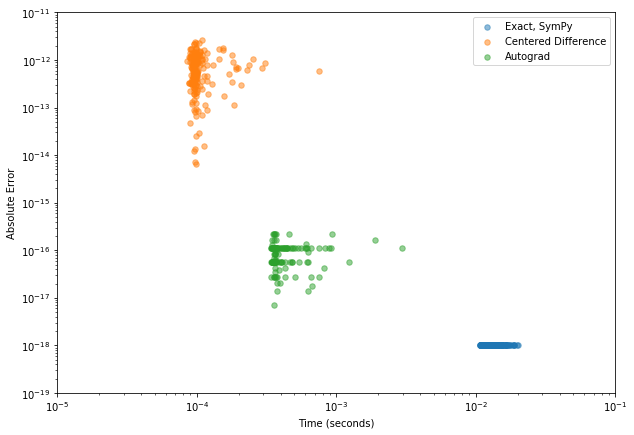

In [35]:
exp(200)